### Iris Classification
In this notebook we are going to do a machine learning project with the goal of classification the iris

### Problem Definition
> How we classify the iris based on train data

### Data
> Data is downloaded from Kaggle- Iris Classification

### Evaluation
> We will be using Classification metrics for evaluation

### Features

In [1]:
import seaborn as sns

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all tools we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Models from Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load Data

In [3]:
# import the data
iris = pd.read_csv("Iris.csv")

In [4]:
iris.shape

(150, 6)

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

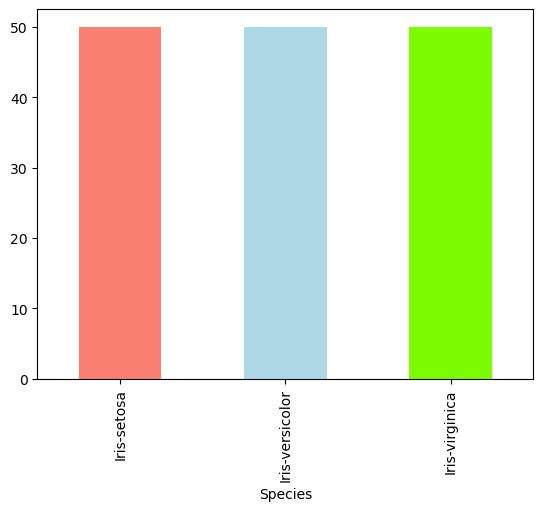

In [8]:
iris["Species"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "lawngreen"]);

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
iris = iris.drop("Id", axis=1)

In [11]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Iris classification based on the features

In [15]:
# Based on Sepal length
iris.SepalLengthCm.value_counts()

SepalLengthCm
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [16]:
# Compare the Species and Sepal Length
pd.crosstab(iris.Species, iris.SepalLengthCm)

SepalLengthCm,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
Species,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,1,3,1,4,2,5,4,8,8,3,...,0,0,0,0,0,0,0,0,0,0
Iris-versicolor,0,0,0,0,0,0,1,2,1,1,...,1,1,1,0,0,0,0,0,0,0
Iris-virginica,0,0,0,0,0,0,1,0,0,0,...,2,3,0,1,3,1,1,1,4,1


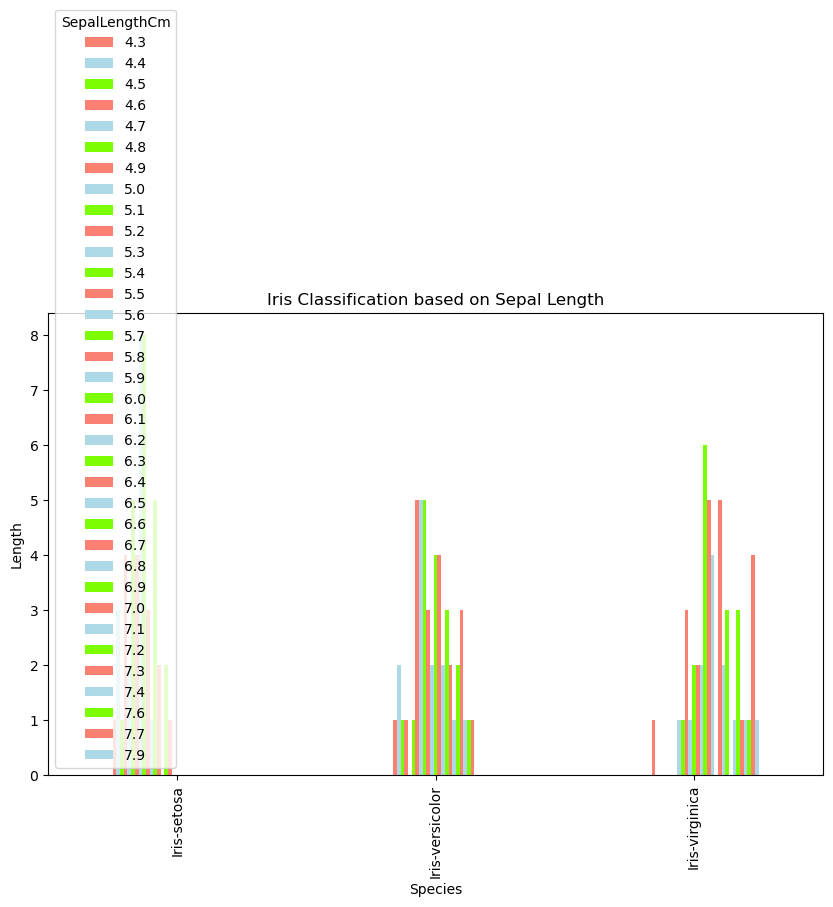

In [17]:
# Create a plot of crosstab
pd.crosstab(iris.Species, iris.SepalLengthCm).plot(kind="bar",
                                                   figsize=(10, 6),
                                                   color=["salmon", "lightblue", "lawngreen"])
plt.title("Iris Classification based on Sepal Length")
plt.xlabel("Species")
plt.ylabel("Length");

In [18]:
iris.PetalLengthCm.value_counts()

PetalLengthCm
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: count, dtype: int64

In [19]:
iris.PetalWidthCm.value_counts()

PetalWidthCm
0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64

In [20]:
iris.SepalWidthCm.value_counts()

SepalWidthCm
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64

### Plot the cross tab for all features and labels

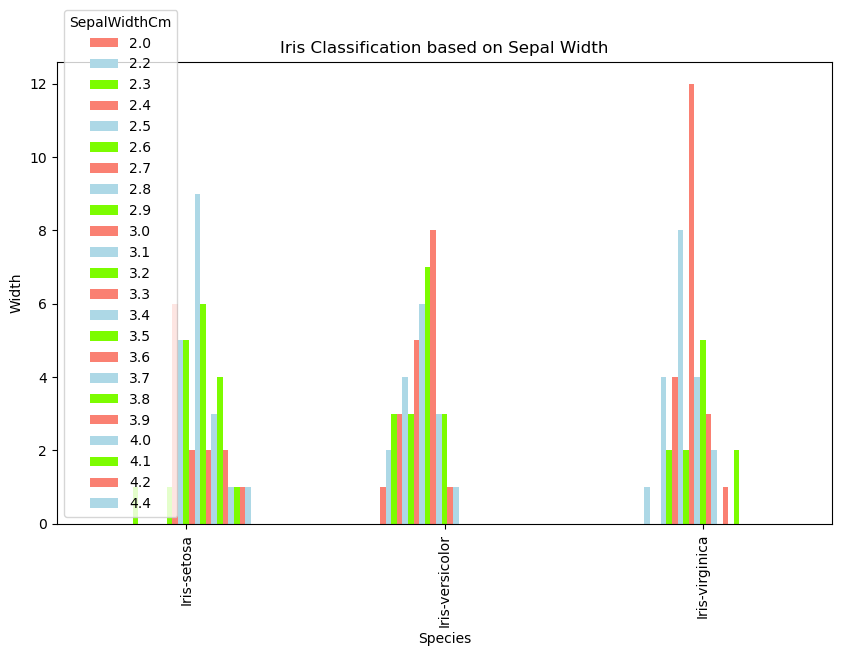

In [21]:
pd.crosstab(iris.Species, iris.SepalWidthCm).plot(kind="bar",
                                                  figsize=(10, 6),
                                                  color=["salmon", "lightblue", "lawngreen"])
plt.title("Iris Classification based on Sepal Width")
plt.xlabel("Species")
plt.ylabel("Width");

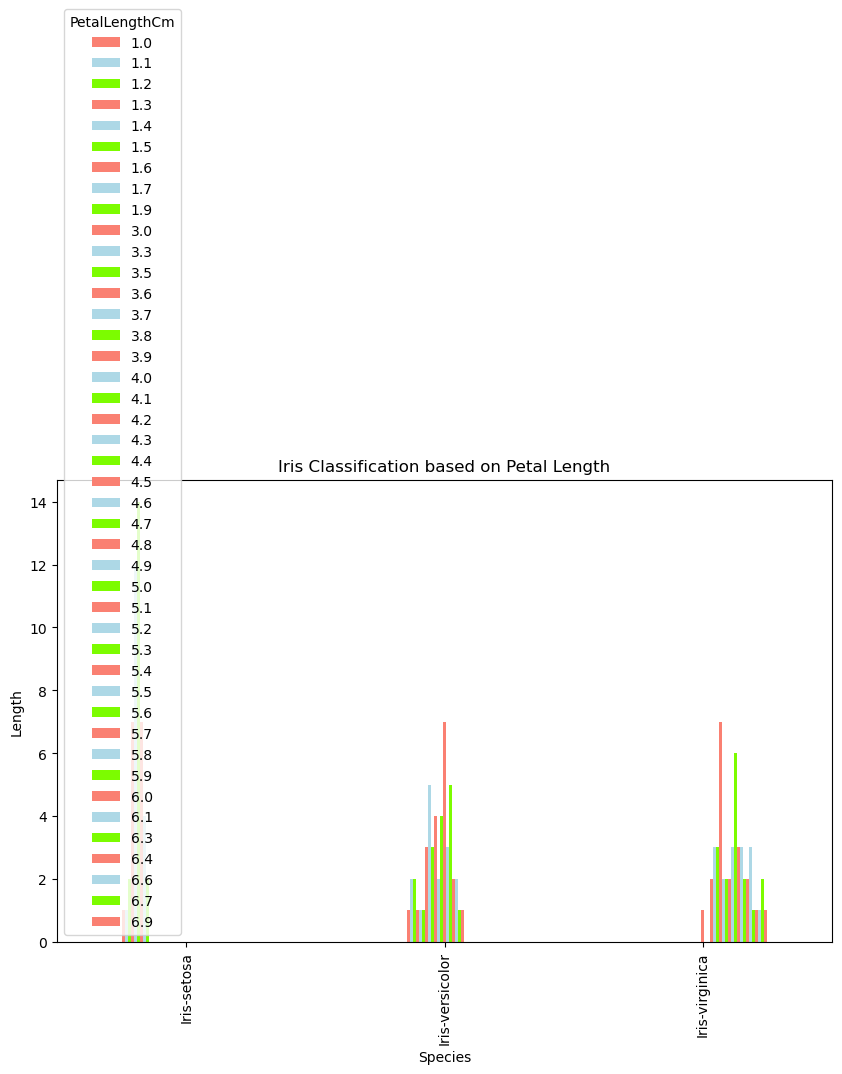

In [22]:
pd.crosstab(iris.Species, iris.PetalLengthCm).plot(kind="bar",
                                                   figsize=(10, 6),
                                                   color=["salmon", "lightblue", "lawngreen"])
plt.title("Iris Classification based on Petal Length")
plt.xlabel("Species")
plt.ylabel("Length");

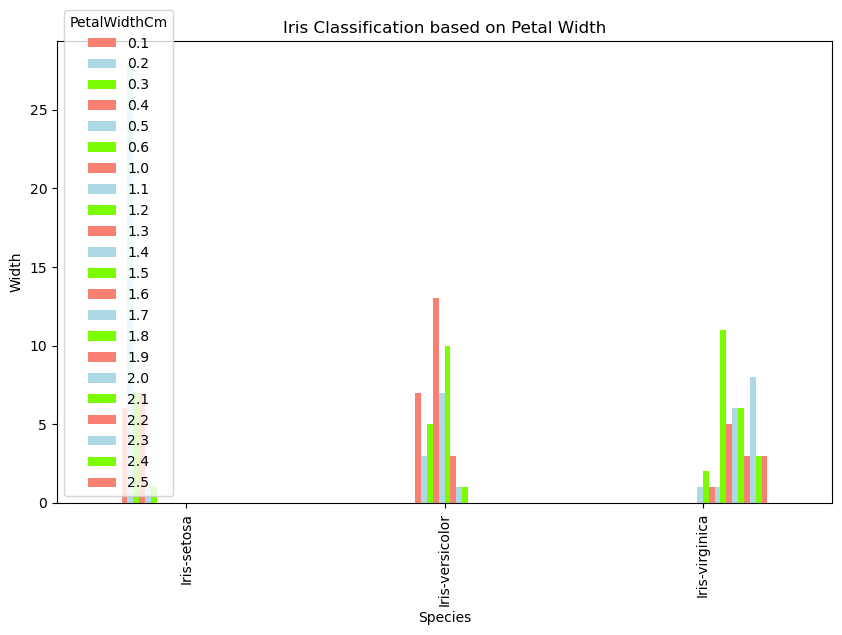

In [23]:
pd.crosstab(iris.Species, iris.PetalWidthCm).plot(kind="bar",
                                                  figsize=(10, 6),
                                                  color=["salmon", "lightblue", "lawngreen"])
plt.title("Iris Classification based on Petal Width")
plt.xlabel("Species")
plt.ylabel("Width");

### Sepal Length Vs Petal Length

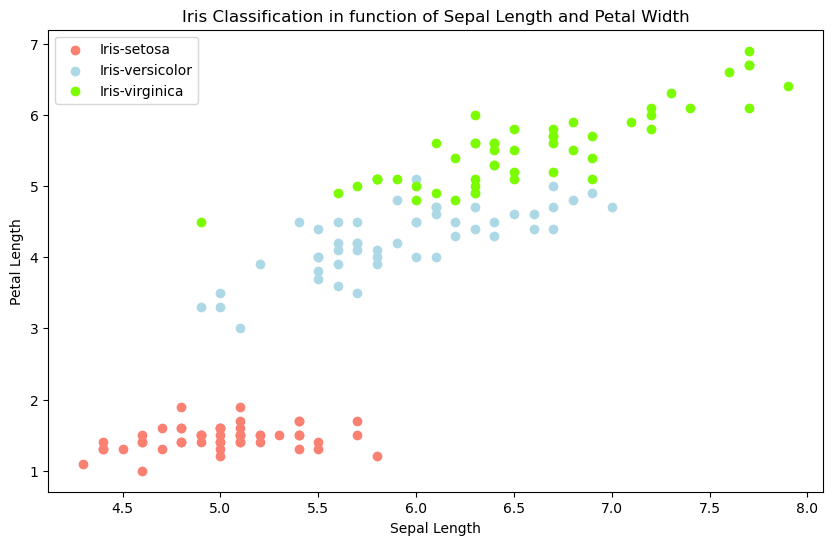

In [24]:
# create fig
plt.figure(figsize=(10, 6))

# scatter plot of three species
plt.scatter(iris.SepalLengthCm[iris.Species == "Iris-setosa"],
            iris.PetalLengthCm[iris.Species == "Iris-setosa"],
            c = "salmon")

plt.scatter(iris.SepalLengthCm[iris.Species == "Iris-versicolor"],
            iris.PetalLengthCm[iris.Species == "Iris-versicolor"],
            c = "lightblue")

plt.scatter(iris.SepalLengthCm[iris.Species == "Iris-virginica"],
            iris.PetalLengthCm[iris.Species == "Iris-virginica"],
            c = "lawngreen")

# Add some Headings
plt.title("Iris Classification in function of Sepal Length and Petal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend(["Iris-setosa", "Iris-versicolor", "Iris-virginica"]);

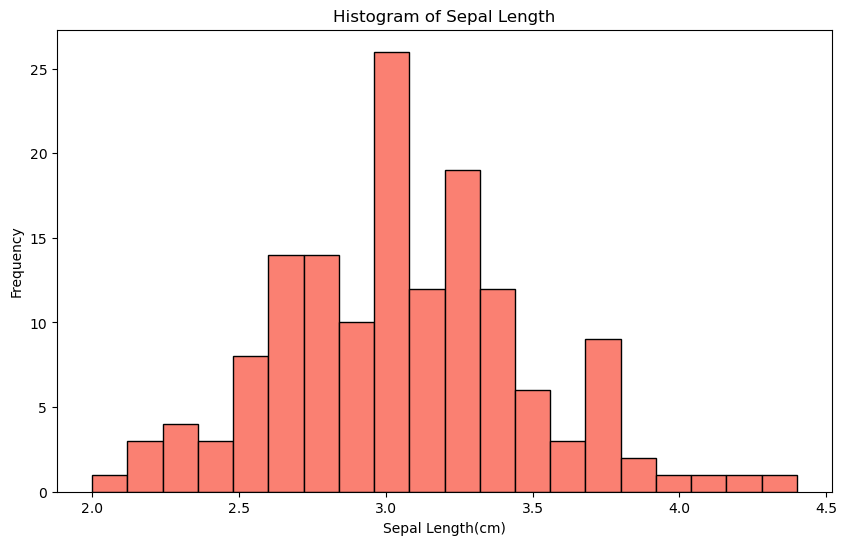

In [25]:
# check the distribution of Sepal Width column in histogram
plt.figure(figsize=(10, 6))

plt.hist(iris.SepalWidthCm, bins = 20, color="salmon", edgecolor="black")

plt.xlabel("Sepal Length(cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Length")

plt.grid(False)
plt.show();

## Neural Network(TensorFlow)

In [29]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install tensorflow

   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.1 MB 2.3 MB/s eta 0:02:44
   ---------------------------------------- 0.2/377.1 MB 2.8 MB/s eta 0:02:17
   ---------------------------------------- 0.5/377.1 MB 3.9 MB/s eta 0:01:36
   ---------------------------------------- 0.7/377.1 MB 4.3 MB/s eta 0:01:28
   ---------------------------------------- 0.9/377.1 MB 4.2 MB/s eta 0:01:30
   ---------------------------------------- 1.0/377.1 MB 3.8 MB/s eta 0:01:38
   ---------------------------------------- 1.2/377.1 MB 3.9 MB/s eta 0:01:38
   ---------------------------------------- 1.2/377.1 MB 3.9 MB/s eta 0:01:38
   ---------------------------------------- 1.2/377.1 MB 3.9 MB/s eta 0:01:38
   ---------------------------------------- 1.7/377.1 MB 3.7 MB/s eta 0:01:42
   ---------------------------------------- 1.9/377.1 MB 3.7 MB/s eta 0:01:42
   ---------------------------------------- 2.0/377.1 MB 3.6 MB/s eta 0

In [26]:
from keras.utils import to_categorical

In [27]:
iris["Species"] = pd.Categorical(iris["Species"])

In [28]:
iris["Species"] = iris.Species.cat.codes

In [29]:
X = iris.drop("Species", axis=1)
Y = to_categorical(iris.Species)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

The model can be summarized as follows:

Input Layer: Expects input vectors of size 4.
Hidden Layer: A dense layer with 100 neurons and ReLU activation.
Output Layer: A dense layer with 3 neurons and softmax activation, outputting probabilities for 3 classes.

In [31]:
from keras.models import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()

In [33]:
model.add(Dense(100, activation="relu", input_shape=(4,)))
model.add(Dense(3, activation="softmax"))

C:\Users\hemax\Documents\predicting_sale_price\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [46]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [35]:
import tensorflow as tf

In [57]:
pip install --upgrade keras

In [36]:
# Assuming you have NumPy arrays for X_train and Y_train
X_train_tensor = tf.convert_to_tensor(X_train)
Y_train_tensor = tf.convert_to_tensor(Y_train)

In [41]:
history = model.fit(X_train_tensor, Y_train_tensor, epochs=45, validation_data=(X_test, Y_test))

Epoch 1/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9656 - loss: 0.3946 - val_accuracy: 0.9667 - val_loss: 0.3917
Epoch 2/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9619 - loss: 0.4092 - val_accuracy: 0.9667 - val_loss: 0.3883
Epoch 3/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9744 - loss: 0.3892 - val_accuracy: 0.9667 - val_loss: 0.3825
Epoch 4/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9740 - loss: 0.3690 - val_accuracy: 0.9667 - val_loss: 0.3760
Epoch 5/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9719 - loss: 0.3812 - val_accuracy: 0.9667 - val_loss: 0.3715
Epoch 6/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9698 - loss: 0.3627 - val_accuracy: 0.9667 - val_loss: 0.3670
Epoch 7/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9542 - loss: 0.3724 - val_accuracy: 0.9667 - val_loss: 0.3643
Epoch 8/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9681 - loss: 0.3733 - val_accuracy: 0.9667 - val_loss: 0.3597


In [38]:
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9667 - loss: 0.3970


[0.3970274329185486, 0.9666666388511658]

In [39]:
pred = model.predict(X_test[:10])
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.04034958 0.5191494  0.440501  ]
 [0.9089839  0.08058538 0.01043064]
 [0.00117259 0.19115578 0.8076716 ]
 [0.04321194 0.5035076  0.4532804 ]
 [0.04024893 0.5284868  0.4312643 ]
 [0.893439   0.09245902 0.01410199]
 [0.13824959 0.5544683  0.30728218]
 [0.01674666 0.39876    0.5844933 ]
 [0.02909313 0.43975717 0.5311497 ]
 [0.09603447 0.5592051  0.34476042]]


In [40]:
p=np.argmax(pred,axis=1)
print(p)
print(Y_test[:10])

[1 0 2 1 1 0 1 2 2 1]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [42]:
history.history["accuracy"]

[0.9583333134651184,
 0.9750000238418579,
 0.9750000238418579,
 0.9583333134651184,
 0.9583333134651184,
 0.9583333134651184,
 0.9583333134651184,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9583333134651184,
 0.9583333134651184,
 0.9750000238418579,
 0.9750000238418579,
 0.9666666388511658,
 0.9583333134651184,
 0.9666666388511658,
 0.9750000238418579,
 0.9666666388511658,
 0.9750000238418579,
 0.9666666388511658,
 0.9666666388511658,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579]

In [43]:
history.history["val_accuracy"]

[0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 1.0,
 1.0,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 1.0,
 1.0,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 1.0,
 1.0,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658,
 1.0,
 1.0,
 0.9666666388511658,
 0.9666666388511658,
 1.0,
 1.0]

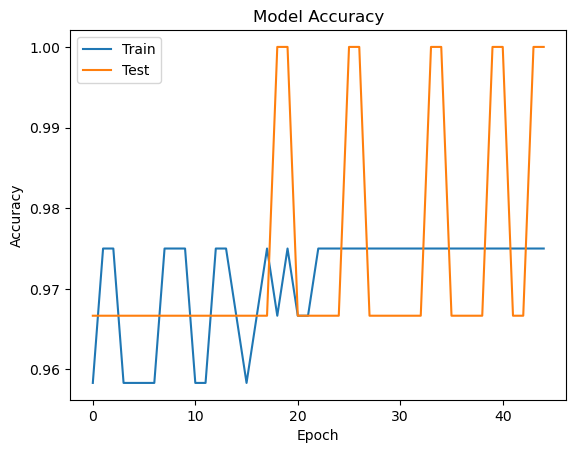

In [44]:
# plotting the accuarcy of both training and testing data

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])
plt.show()